<a href="https://colab.research.google.com/github/MohanZhu0623/Sentiment_Analysis/blob/main/Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, average_precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [22]:
df = pd.read_excel('/content/kickstarter_data_sampled_sentiment&WC.xlsx')

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


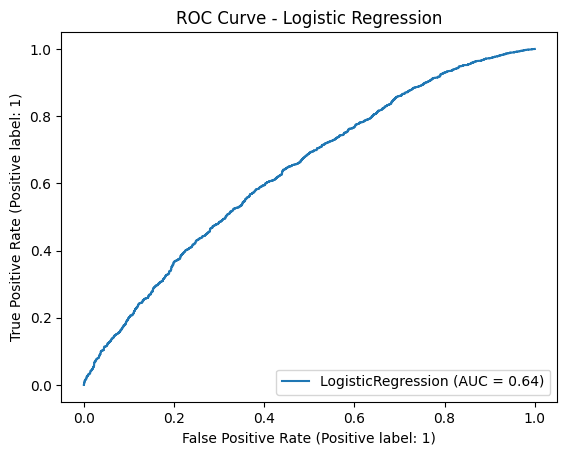

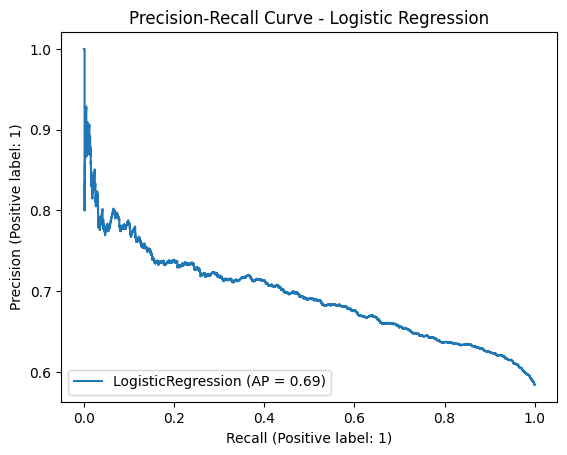

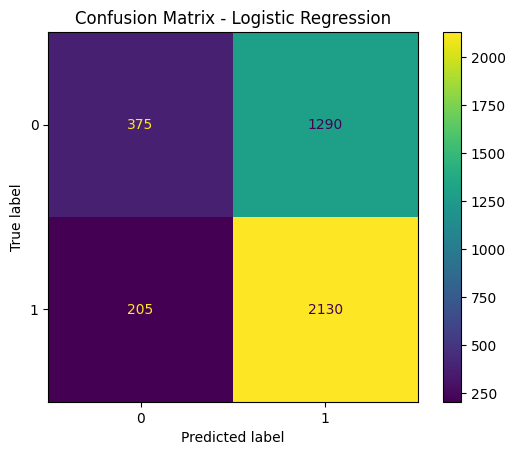

Logistic Regression Performance Metrics:
Log loss = 0.67007
AUC = 0.63693
Average Precision = 0.69398

Using 0.5 as threshold:
Accuracy = 0.62625
Precision = 0.62281
Recall = 0.91221
F1 score = 0.74023

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.23      0.33      1665
           1       0.62      0.91      0.74      2335

    accuracy                           0.63      4000
   macro avg       0.63      0.57      0.54      4000
weighted avg       0.63      0.63      0.57      4000


Logistic Regression Coefficients:
           variable  coefficient
0        intercept    -0.006994
1            const     0.000000
2       word_count     0.696568
3    word_count_sq    -0.846720
4             goal   -13.119007
5  date_difference     0.040488
6     sentiment_-1     0.196522
7      sentiment_0    -0.040003
8      sentiment_1    -0.108547
Training Random Forest...


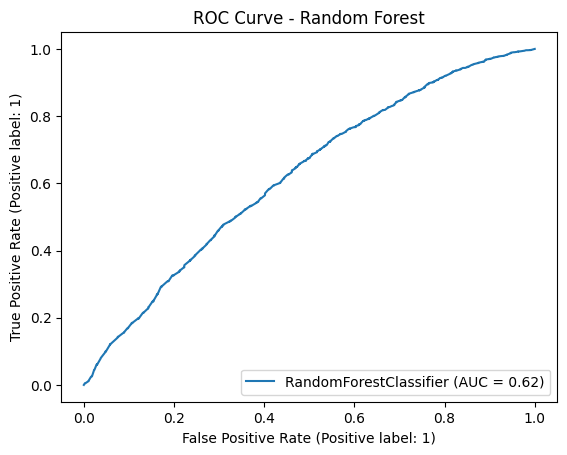

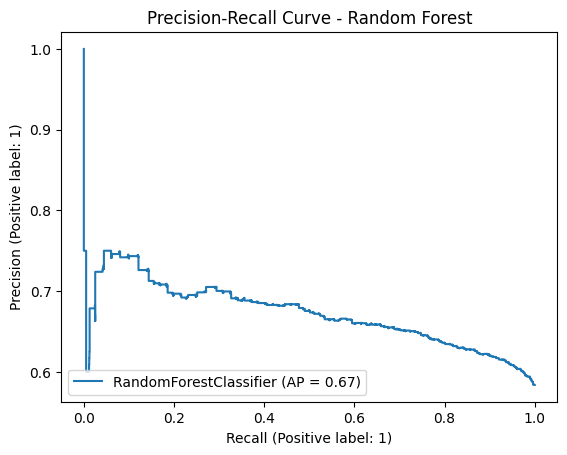

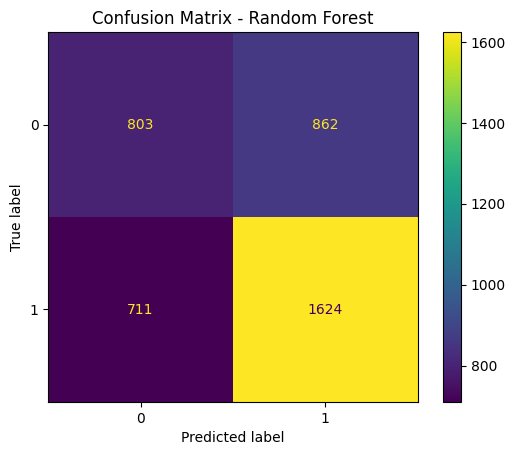

Random Forest Performance Metrics:
Log loss = 0.85193
AUC = 0.62177
Average Precision = 0.67171

Using 0.5 as threshold:
Accuracy = 0.60675
Precision = 0.65326
Recall = 0.69550
F1 score = 0.67372

Classification Report
              precision    recall  f1-score   support

           0       0.53      0.48      0.51      1665
           1       0.65      0.70      0.67      2335

    accuracy                           0.61      4000
   macro avg       0.59      0.59      0.59      4000
weighted avg       0.60      0.61      0.60      4000


Random Forest Feature Importances:
           variable  importance
0            const    0.000000
1       word_count    0.073683
2    word_count_sq    0.073384
3             goal    0.397807
4  date_difference    0.434005
5     sentiment_-1    0.010305
6      sentiment_0    0.004861
7      sentiment_1    0.005955
Training K-Nearest Neighbors...


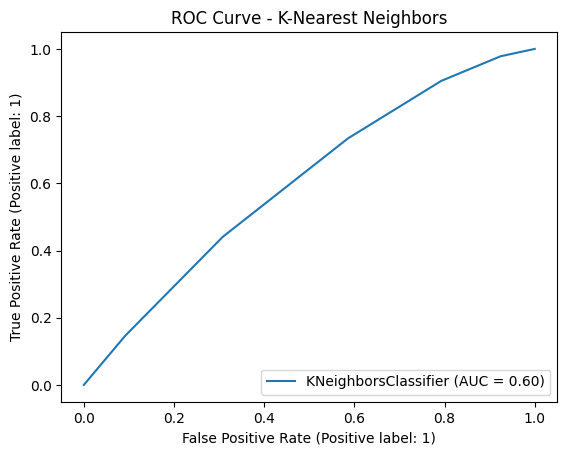

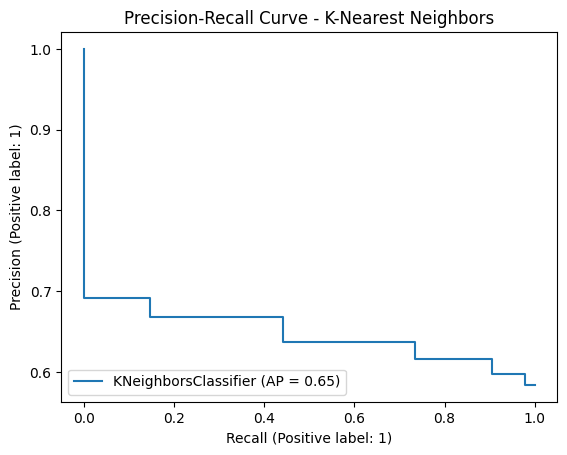

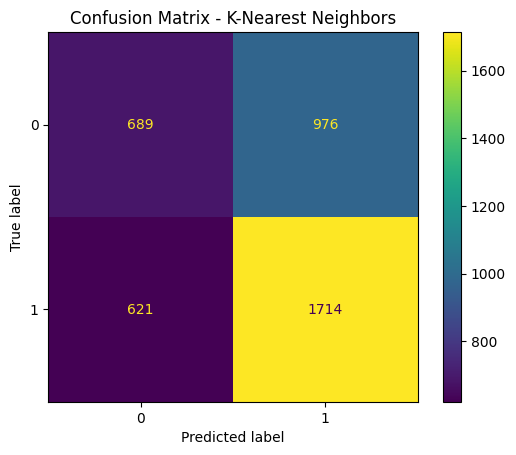

K-Nearest Neighbors Performance Metrics:
Log loss = 2.43129
AUC = 0.60154
Average Precision = 0.64613

Using 0.5 as threshold:
Accuracy = 0.60075
Precision = 0.63717
Recall = 0.73405
F1 score = 0.68219

Classification Report
              precision    recall  f1-score   support

           0       0.53      0.41      0.46      1665
           1       0.64      0.73      0.68      2335

    accuracy                           0.60      4000
   macro avg       0.58      0.57      0.57      4000
weighted avg       0.59      0.60      0.59      4000

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


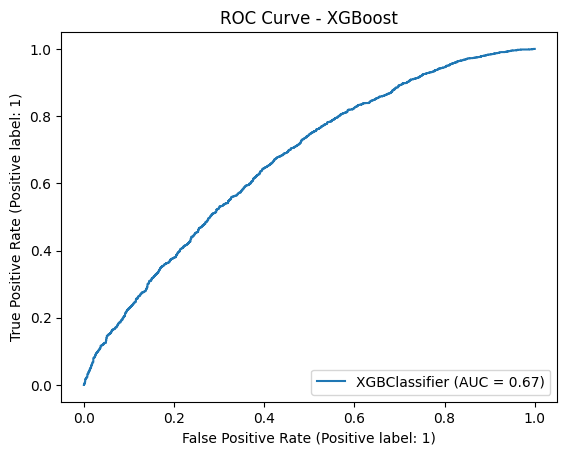

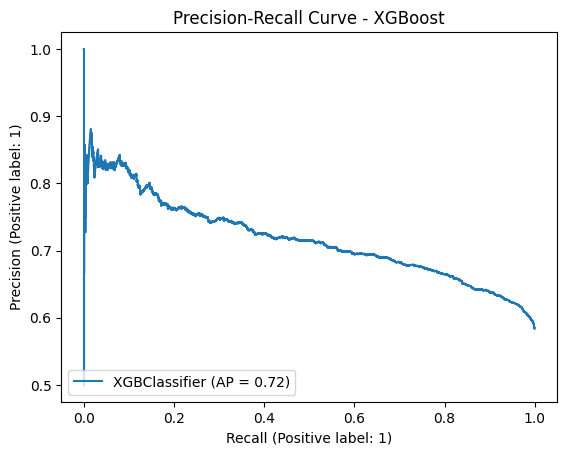

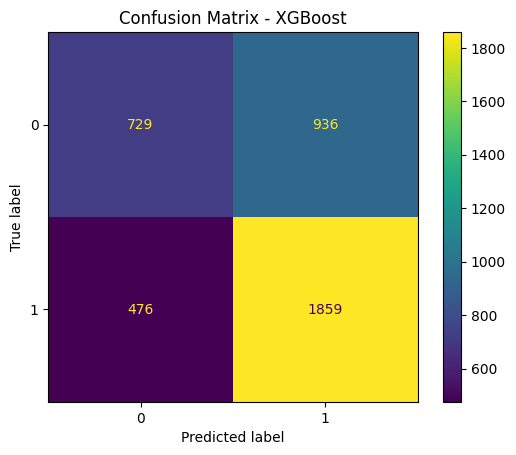

XGBoost Performance Metrics:
Log loss = 0.64742
AUC = 0.66887
Average Precision = 0.71677

Using 0.5 as threshold:
Accuracy = 0.64700
Precision = 0.66512
Recall = 0.79615
F1 score = 0.72476

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.44      0.51      1665
           1       0.67      0.80      0.72      2335

    accuracy                           0.65      4000
   macro avg       0.64      0.62      0.62      4000
weighted avg       0.64      0.65      0.63      4000


XGBoost Feature Importances:
           variable  importance
0            const    0.000000
1       word_count    0.111824
2    word_count_sq    0.000000
3             goal    0.219888
4  date_difference    0.155531
5     sentiment_-1    0.312021
6      sentiment_0    0.092519
7      sentiment_1    0.108216
Training Decision Tree...


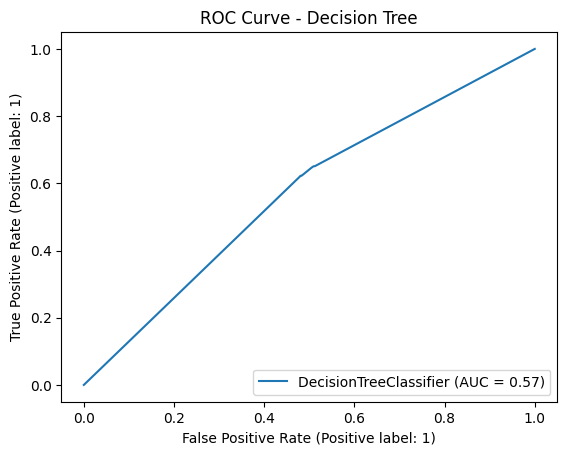

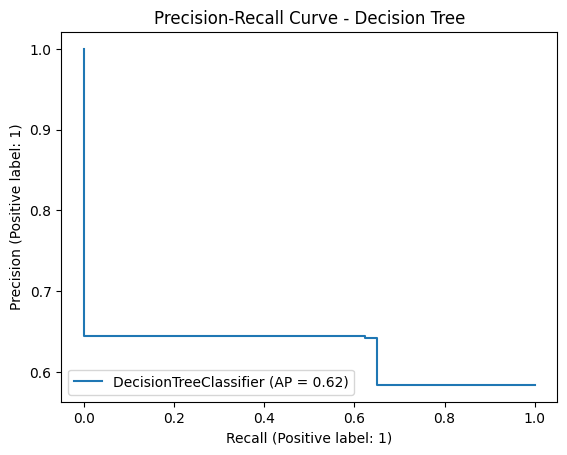

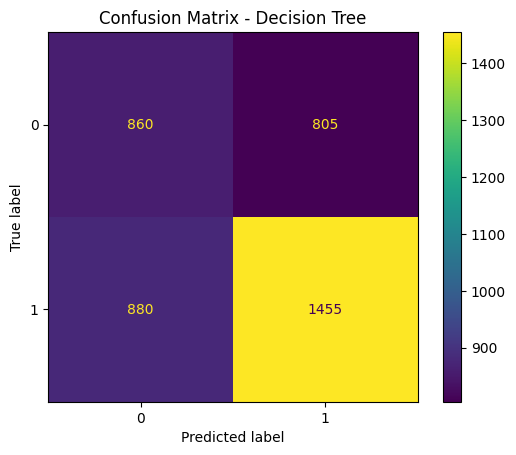

Decision Tree Performance Metrics:
Log loss = 14.57385
AUC = 0.57225
Average Precision = 0.62339

Using 0.5 as threshold:
Accuracy = 0.57875
Precision = 0.64381
Recall = 0.62313
F1 score = 0.63330

Classification Report
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1665
           1       0.64      0.62      0.63      2335

    accuracy                           0.58      4000
   macro avg       0.57      0.57      0.57      4000
weighted avg       0.58      0.58      0.58      4000


Decision Tree Feature Importances:
           variable  importance
0            const    0.000000
1       word_count    0.137994
2    word_count_sq    0.134057
3             goal    0.320388
4  date_difference    0.341477
5     sentiment_-1    0.014987
6      sentiment_0    0.025921
7      sentiment_1    0.025176

Logistic Regression Feature Importances:
          variable  coefficient
0        intercept    -0.006994
1            const     0.000000

In [9]:
# Preprocess data
df['state'] = df['state'].map({'failed': 0, 'successful': 1})

# Feature engineering
df['word_count_sq'] = df['word_count'] ** 2
df['goal_ln'] = np.log1p(df['goal'])

# Convert sentiment column to dummy variables
df['sentiment_-1'] = (df['sentiment'] == -1).astype(int)
df['sentiment_0'] = (df['sentiment'] == 0).astype(int)
df['sentiment_1'] = (df['sentiment'] == 1).astype(int)

# Log transform of usd_pledged
df['usd_pledged_log'] = np.log1p(df['usd_pledged'])

# Define features and target variable
X = df[['word_count', 'word_count_sq', 'goal', 'date_difference', 'sentiment_-1', 'sentiment_0', 'sentiment_1'] + [col for col in df.columns if col.startswith('category_')]]
y = df['state']

# Add intercept term
X = sm.add_constant(X)

# Split dataset into training and testing sets
random_seed = 888
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train)
X_test = scaler.transform(df_test)

# Define and train different models
models = {
    "Logistic Regression": LogisticRegression(penalty='none', max_iter=100),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=random_seed),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed)
}

# Store feature importance results
feature_importance_results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate and plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve - {model_name}")
    plt.show()

    # Calculate and plot precision-recall curve
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.show()

    # Calculate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Calculate performance metrics
    print(f"{model_name} Performance Metrics:")
    print('Log loss = {:.5f}'.format(log_loss(y_test, y_prob)))
    print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_prob)))
    print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_prob)))
    print('\nUsing 0.5 as threshold:')
    print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision = {:.5f}'.format(precision_score(y_test, y_pred)))
    print('Recall = {:.5f}'.format(recall_score(y_test, y_pred)))
    print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred)))

    print('\nClassification Report')
    print(classification_report(y_test, y_pred))

    # Get model feature importance (if available)
    if hasattr(model, 'coef_'):
        coefficients = np.hstack((model.intercept_, model.coef_[0]))
        coef_df = pd.DataFrame(data={'variable': ['intercept'] + list(X.columns), 'coefficient': coefficients})
        feature_importance_results[model_name] = coef_df
        print(f"\n{model_name} Coefficients:\n", coef_df)
    elif hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = list(X.columns)
        coef_df = pd.DataFrame(data={'variable': feature_names, 'importance': feature_importances})
        feature_importance_results[model_name] = coef_df
        print(f"\n{model_name} Feature Importances:\n", coef_df)

# Print feature importance for all models
for model_name, importance_df in feature_importance_results.items():
    print(f"\n{model_name} Feature Importances:")
    print(importance_df)


Training Logistic Regression...
Logistic Regression Performance Metrics:
Log loss = 0.67007
AUC = 0.63693
Average Precision = 0.69398
Accuracy = 0.62625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


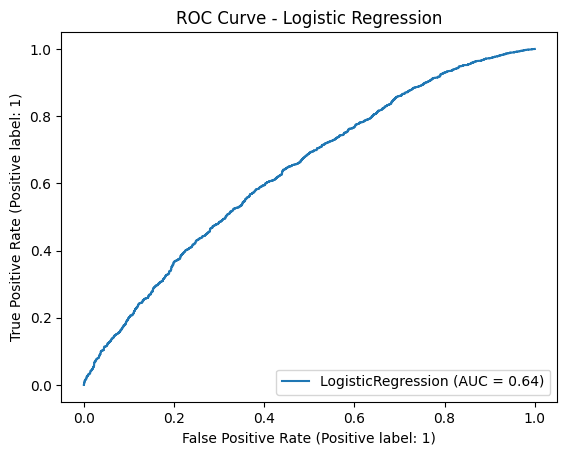

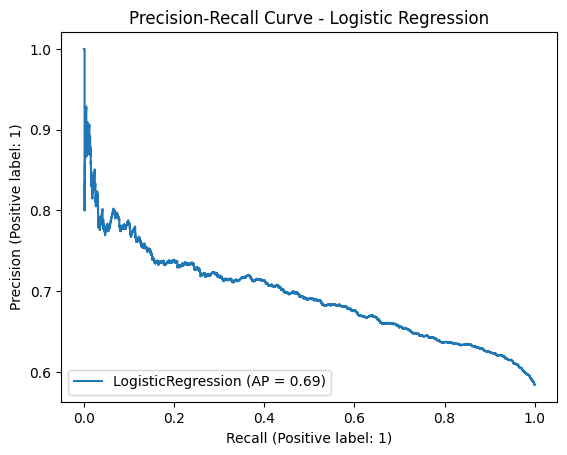

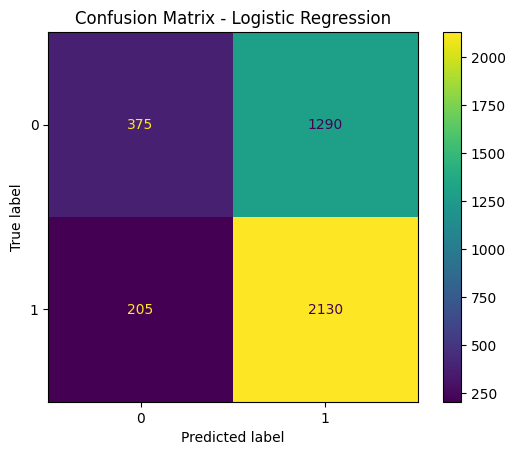


Logistic Regression Coefficients:
           variable  coefficient
0        intercept    -0.006994
1            const     0.000000
2       word_count     0.696568
3    word_count_sq    -0.846720
4             goal   -13.119007
5  date_difference     0.040488
6     sentiment_-1     0.196522
7      sentiment_0    -0.040003
8      sentiment_1    -0.108547
Training Random Forest...
Random Forest Performance Metrics:
Log loss = 0.85193
AUC = 0.62177
Average Precision = 0.67171
Accuracy = 0.60675


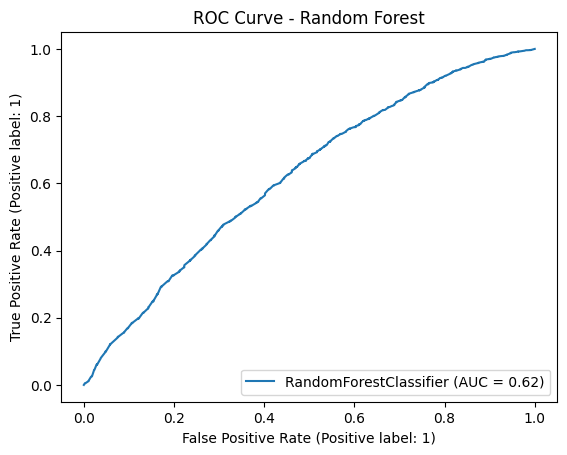

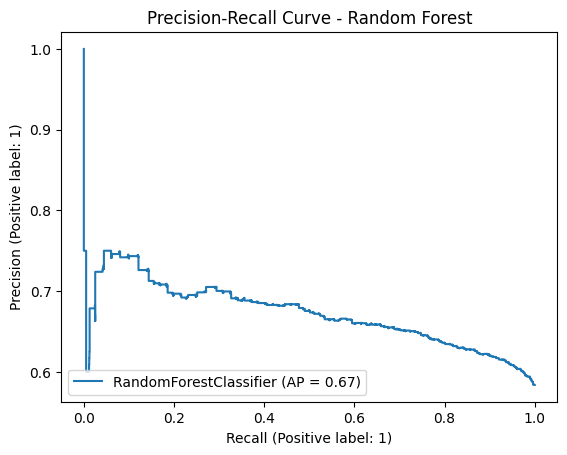

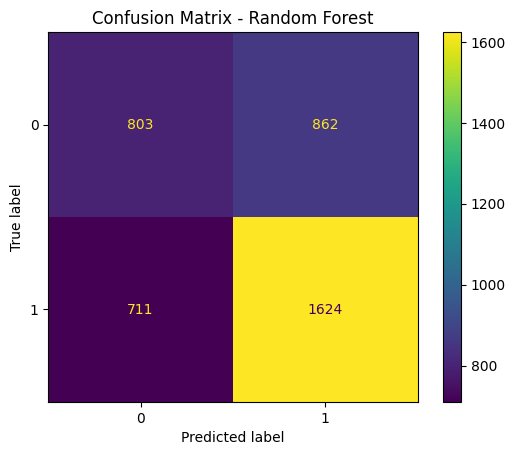


Random Forest Feature Importances:
           variable  importance
0            const    0.000000
1       word_count    0.073683
2    word_count_sq    0.073384
3             goal    0.397807
4  date_difference    0.434005
5     sentiment_-1    0.010305
6      sentiment_0    0.004861
7      sentiment_1    0.005955
Training K-Nearest Neighbors...
K-Nearest Neighbors Performance Metrics:
Log loss = 2.43129
AUC = 0.60154
Average Precision = 0.64613
Accuracy = 0.60075


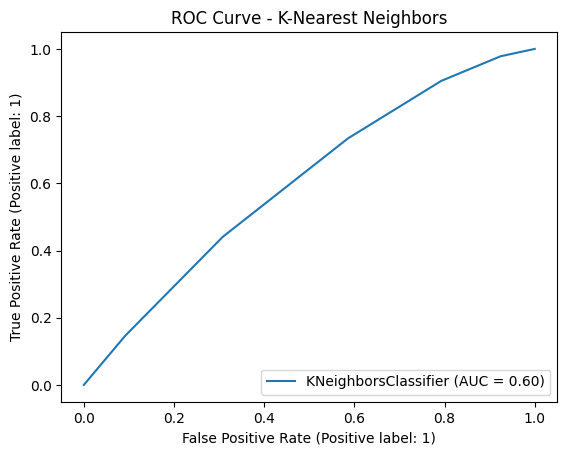

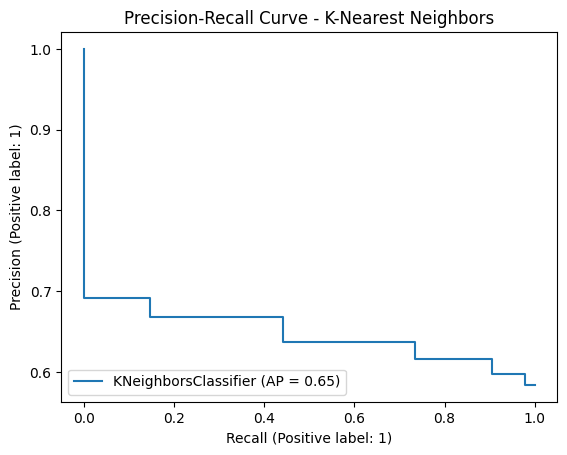

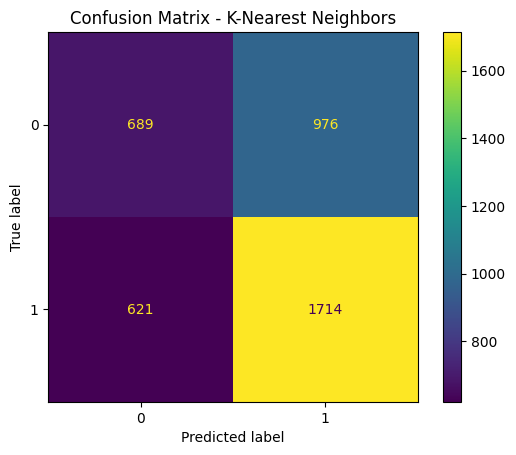

Training XGBoost...
XGBoost Performance Metrics:
Log loss = 0.64742
AUC = 0.66887
Average Precision = 0.71677
Accuracy = 0.64700


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:29:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


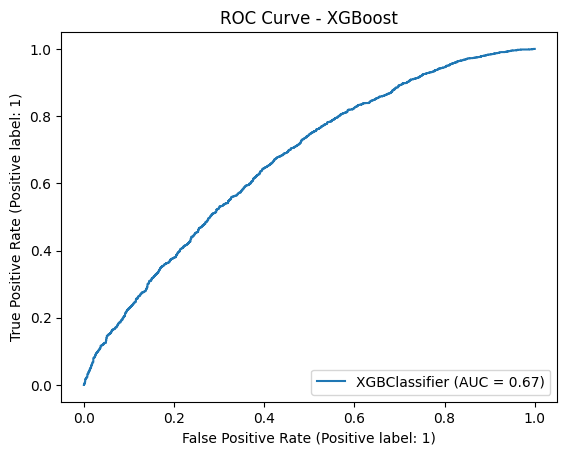

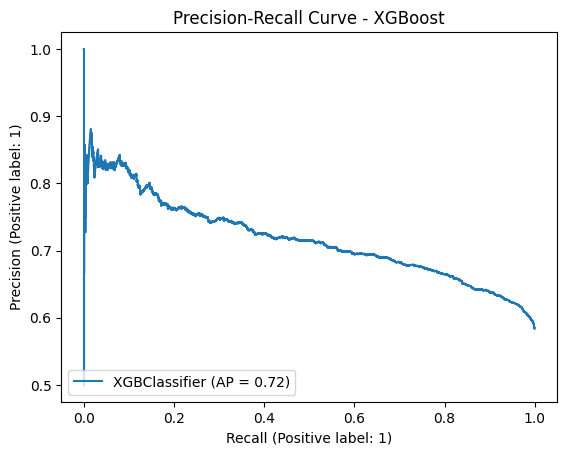

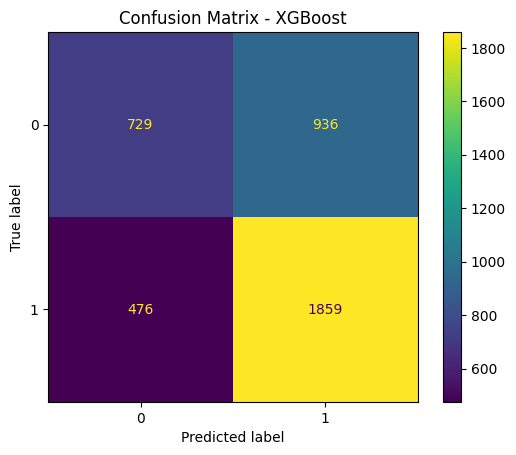


XGBoost Feature Importances:
           variable  importance
0            const    0.000000
1       word_count    0.111824
2    word_count_sq    0.000000
3             goal    0.219888
4  date_difference    0.155531
5     sentiment_-1    0.312021
6      sentiment_0    0.092519
7      sentiment_1    0.108216
Training Decision Tree...
Decision Tree Performance Metrics:
Log loss = 14.57385
AUC = 0.57225
Average Precision = 0.62339
Accuracy = 0.57875


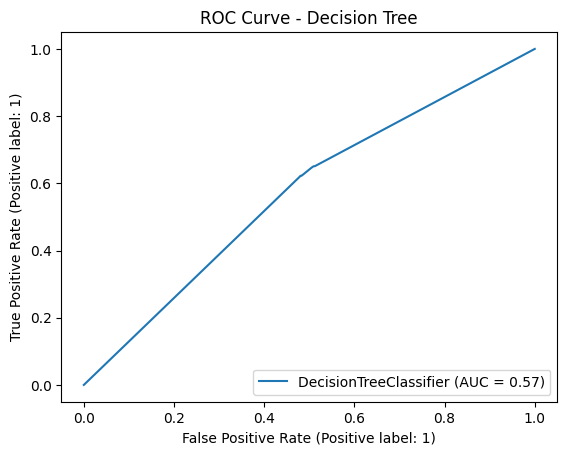

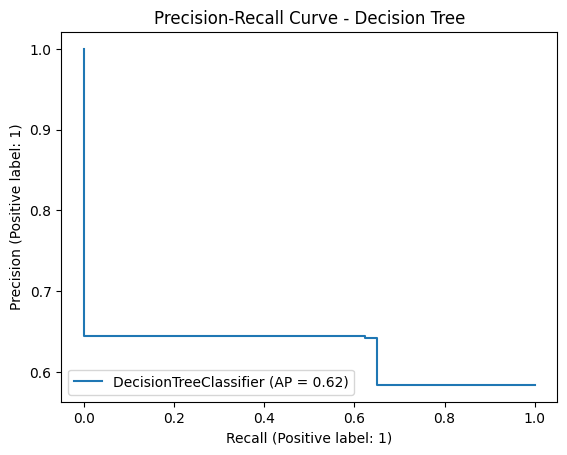

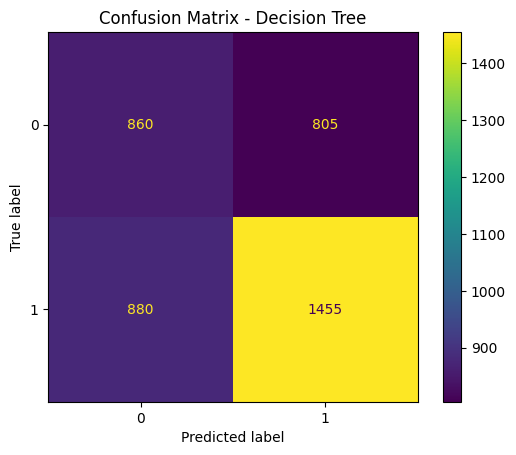


Decision Tree Feature Importances:
           variable  importance
0            const    0.000000
1       word_count    0.137994
2    word_count_sq    0.134057
3             goal    0.320388
4  date_difference    0.341477
5     sentiment_-1    0.014987
6      sentiment_0    0.025921
7      sentiment_1    0.025176
Model Performance Metrics:
                 Model   Log loss       AUC  Average Precision  Accuracy
0  Logistic Regression   0.670068  0.636927           0.693977   0.62625
1        Random Forest   0.851928  0.621766           0.671707   0.60675
2  K-Nearest Neighbors   2.431292  0.601542           0.646132   0.60075
3              XGBoost   0.647416  0.668872           0.716773   0.64700
4        Decision Tree  14.573851  0.572248           0.623393   0.57875
Model Classification Reports:
              precision    recall  f1-score  support                Model
0              0.646552  0.225225  0.334076   1665.0  Logistic Regression
1              0.622807  0.912206  0.7402

In [23]:
# Preprocess data
df['state'] = df['state'].map({'failed': 0, 'successful': 1})

# Feature engineering
df['word_count_sq'] = df['word_count'] ** 2
df['goal_ln'] = np.log1p(df['goal'])

# Convert sentiment column to dummy variables
df['sentiment_-1'] = (df['sentiment'] == -1).astype(int)
df['sentiment_0'] = (df['sentiment'] == 0).astype(int)
df['sentiment_1'] = (df['sentiment'] == 1).astype(int)

# Log transform of usd_pledged
df['usd_pledged_log'] = np.log1p(df['usd_pledged'])

# Define features and target variable
X = df[['word_count', 'word_count_sq', 'goal', 'date_difference', 'sentiment_-1', 'sentiment_0', 'sentiment_1'] + [col for col in df.columns if col.startswith('category_')]]
y = df['state']

# Add intercept term
X = sm.add_constant(X)

# Split dataset into training and testing sets
random_seed = 888
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train)
X_test = scaler.transform(df_test)

# Define and train different models
models = {
    "Logistic Regression": LogisticRegression(penalty='none', max_iter=100),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=random_seed),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed)
}

# Store feature importance results
feature_importance_results = {}

# Initialize a dictionary to store performance metrics
performance_metrics = {
    'Model': [],
    'Log loss': [],
    'AUC': [],
    'Average Precision': [],
    'Accuracy': []
}

# Collect performance metrics for each model
classification_reports = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate performance metrics
    logloss = log_loss(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)

    # Append the metrics to the dictionary
    performance_metrics['Model'].append(model_name)
    performance_metrics['Log loss'].append(logloss)
    performance_metrics['AUC'].append(auc)
    performance_metrics['Average Precision'].append(avg_precision)
    performance_metrics['Accuracy'].append(accuracy)

    print(f"{model_name} Performance Metrics:")
    print('Log loss = {:.5f}'.format(logloss))
    print('AUC = {:.5f}'.format(auc))
    print('Average Precision = {:.5f}'.format(avg_precision))
    print('Accuracy = {:.5f}'.format(accuracy))

    # Calculate and plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve - {model_name}")
    plt.show()

    # Calculate and plot precision-recall curve
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.show()

    # Calculate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Get the classification report as a dictionary
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()

    # Add model name to the dataframe
    report_df['Model'] = model_name

    # Append the dataframe to the list
    classification_reports.append(report_df)

    # Get model feature importance (if available)
    if hasattr(model, 'coef_'):
        coefficients = np.hstack((model.intercept_, model.coef_[0]))
        coef_df = pd.DataFrame(data={'variable': ['intercept'] + list(X.columns), 'coefficient': coefficients})
        feature_importance_results[model_name] = coef_df
        print(f"\n{model_name} Coefficients:\n", coef_df)
    elif hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = list(X.columns)
        coef_df = pd.DataFrame(data={'variable': feature_names, 'importance': feature_importances})
        feature_importance_results[model_name] = coef_df
        print(f"\n{model_name} Feature Importances:\n", coef_df)

# Convert performance metrics dictionary to DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Concatenate all classification reports
final_report = pd.concat(classification_reports)

# Remove 'accuracy' row from the classification report
final_report = final_report[final_report.index != 'accuracy']

# Display the performance metrics DataFrame
print("Model Performance Metrics:")
print(performance_df)

# Display the classification reports
print("Model Classification Reports:")
print(final_report)

# Optionally, save the final report to a CSV file
final_report.to_csv("model_classification_reports.csv")
